### Temperature and Salinity Plots

In [37]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd
from matplotlib import gridspec
import gsw
import ast

In [38]:
pip install gsw

Note: you may need to restart the kernel to use updated packages.


### need to have plots like th ecco vertical profiles, only do depths between 200 and 500... find the averages of the salt profile between those depth and the temp...

### Professor Wood's T-S Diagram code

In [39]:
# define parameters in common units
pressure = 5 # dbar
practical_salinity = np.linspace(32.5,36) # psu
potential_temperature = np.linspace(2,30) # degrees C
longitude = 0 # degrees
latitude = 0 # degrees

# convert to units used in density approximation
absolute_salinity = gsw.conversions.SA_from_SP(practical_salinity, pressure, longitude, latitude)
conservative_temperature = gsw.conversions.CT_from_pt(absolute_salinity, potential_temperature)

# make a 2D mesh grid of salinity and temperature for plotting
Absolute_Salinity, Conservative_Temperature = np.meshgrid(absolute_salinity, conservative_temperature)

# compute density from salinity and temperature
Rho = gsw.density.rho(Absolute_Salinity, Conservative_Temperature, pressure)

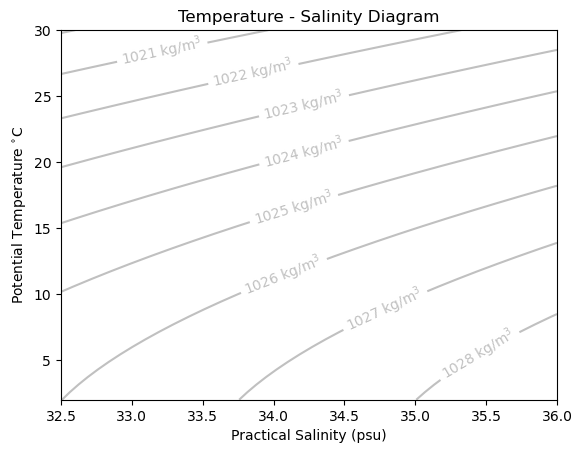

In [40]:
fig = plt.figure()
C = plt.contour(practical_salinity, potential_temperature, Rho,
                colors='silver', levels = np.arange(1020,1029))
plt.gca().clabel(C, C.levels, inline=True, fontsize=10,
                 fmt = lambda d : str(round(d))+' kg/m$^3$')
plt.ylabel('Potential Temperature $^{\circ}$C')
plt.xlabel('Practical Salinity (psu)')
plt.title('Temperature - Salinity Diagram')
plt.show()

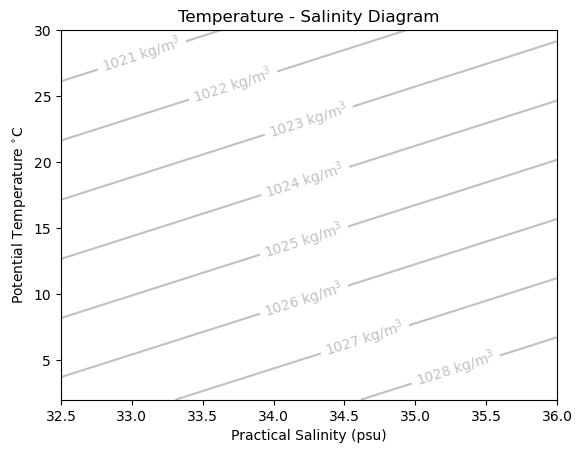

In [46]:
# define coefficients
Rho_0 = 1002        # reference density, kg/m^3
alpha = -2.23e-4    # K^-1
beta = 7.59e-4      # (g/kg)^-1

# approximate density with coefficients
Rho_Approx = Rho_0 + Rho_0*(alpha*Conservative_Temperature+beta*Absolute_Salinity)

# make a plot
fig = plt.figure()
C = plt.contour(practical_salinity, potential_temperature, Rho_Approx,
                colors='silver', levels = np.arange(1020,1029))
plt.gca().clabel(C, C.levels, inline=True, fontsize=10,
                 fmt = lambda d : str(round(d))+' kg/m$^3$')
plt.ylabel('Potential Temperature $^{\circ}$C')
plt.xlabel('Practical Salinity (psu)')
plt.title('Temperature - Salinity Diagram')
plt.show()

### Need to make a script that iterates through the depth data, if it's greater than 200 and less than 500, get those salt and temp profiles from "profile" column, as well as the temp and salt from reading the OMG CTD file, from the "OMG_data" folder, and use them to plot on the T-S diagram.
### I need to plot the OMG and model points differently (i.e boxes and points)
### Sorted by region as well, look in the "Region" column.

In [66]:
# Verifying the column names!

#omg_headers = pd.DataFrame({'omg': omg_csv.columns.tolist()})
test_summary_ASTE_salt = pd.read_csv('test_summary_ASTE_salt.csv')
summary_ECCO_salt = pd.read_csv('summary_ECCO_salt.csv')
summary_ORAS5_salt = pd.read_csv('summary_ORAS5_salt.csv')
summary_GLORYS_salt = pd.read_csv('summary_GLORYS_salt.csv')

test_summary_ASTE_temp = pd.read_csv('test_summary_ASTE_temp.csv')
summary_ECCO_temp = pd.read_csv('summary_ECCO_temp.csv')
summary_ORAS5_temp = pd.read_csv('summary_ORAS5_temp.csv')
summary_GLORYS_temp = pd.read_csv('summary_GLORYS_temp.csv')

ecco_salt_headers = pd.DataFrame({'ecco': summary_ECCO_salt.columns.tolist()})
aste_salt_headers = pd.DataFrame({'aste': summary_ASTE_salt.columns.tolist()})
oras5_salt_headers = pd.DataFrame({'oras5':summary_ORAS5_salt.columns.tolist()})
glorys_salt_headers = pd.DataFrame({'glorys':summary_GLORYS_salt.columns.tolist()})

all_headers = pd.concat([ecco_salt_headers, aste_salt_headers, oras5_salt_headers, glorys_salt_headers], axis=1)
display(all_headers) 

,ecco,aste,oras5,glorys
0,CTD_file,CTD_file,CTD_file,CTD_file
1,File_ID,File_ID,File_ID,File_ID
2,Var_type,Var_type,Var_type,Var_type
3,Region,Region,Region,Region
4,OMG_Mean,OMG_Mean,OMG_Mean,OMG_Mean
5,Model_Mean,Model_Mean,Model_Mean,Model_Mean
6,Difference,Difference,Difference,Difference
7,Model_Profile,Model_Profile,Model_Profile,Model_Profile
8,depth_profile,depth_profile,depth_profile,depth_profile
9,omg_depth,omg_depth,omg_depth,omg_depth


#### Some testing:

In [64]:
summary_ASTE_salt['depth_profile']

0      [5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...
1      [5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...
2      [5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...
3      [5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...
4      [5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...
                             ...                        
329    [5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...
330    [5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...
331    [5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...
332    [5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...
333    [5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...
Name: depth_profile, Length: 334, dtype: object

In [9]:
df = summary_ASTE_salt

# Path to OMG CTD folder
OMG_CTD_FOLDER = "/Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/OMG_data"

# Helper to parse model profiles from CSV
def parse_profile(val):
    if isinstance(val, str):
        return [float(x) for x in ast.literal_eval(val)]
    elif isinstance(val, list):
        return val
    return []

# Helper to read CTD profile from folder
def read_ctd_file(ctd_file):
    path = os.path.join(OMG_CTD_FOLDER, ctd_file)
    if not os.path.exists(path):
        print(f"CTD file not found: {path}")
        return [], [], []
    try:
        ds = xr.open_dataset(path)
        temps = ds["potential_temperature"].values
        salts = ds["practical_salinity"].values
        depths = ds["depth"].values
        ds.close()
        return temps, salts, depths
    except Exception as e:
        print(f"Error reading {path}: {e}")
        return [], [], []

### START PLOTTING

In [67]:
# Edit based on where the plots should be saved

plot_folder = "/Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/Plots/Averages_T_S_Plots"
os.makedirs(plot_folder, exist_ok=True)

### ASTE

In [68]:
# Load model data
model_temp = test_summary_ASTE_temp
model_salt = test_summary_ASTE_salt
model = "ASTE"

model_df = model_temp.merge(
    model_salt,
    on=["CTD_file", "File_ID", "Region"],
    suffixes=("_temp", "_salt")
)

# Regions to plot
region_positions = {
    "N":  (0, 0),
    "NW": (1, 0),
    "CW": (2, 0),
    "SW": (3, 0),
    "NE": (0, 1),
    "CE": (1, 1),
    "SE": (2, 1)
}

fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 2, figure=fig)

for region, (r, c) in region_positions.items():
    ax = fig.add_subplot(gs[r, c])
    region_model = model_df[model_df["Region"] == region]
    
    all_temp_model, all_salt_model = [], []
    all_temp_omg, all_salt_omg = [], []
    
    for _, row in region_model.iterrows():
        # MODEL profile from CSV
        temps_model = parse_profile(row["Model_Profile_temp"])
        salts_model = parse_profile(row["Model_Profile_salt"])
        depths_model = parse_profile(row["depth_profile_temp"])
        #print(depths_model)

        # Collect only the values within depth range using zip
        temp_vals_model = []
        salt_vals_model = []
        for t, s, d in zip(temps_model, salts_model, depths_model):
            if 200 <= d <= 500 and t != 0.0 and s != 0.0:
                temp_vals_model.append(t)
                salt_vals_model.append(s)
        if temp_vals_model and salt_vals_model:
            avg_temp_model = np.mean(temp_vals_model)
            avg_salt_model = np.mean(salt_vals_model)
            all_temp_model.append(avg_temp_model)
            all_salt_model.append(avg_salt_model)

        # OMG profile
        ctd_file = row["CTD_file"]
        omg_temp, omg_salt, omg_depth = read_ctd_file(ctd_file)
        temp_vals_omg = []
        salt_vals_omg = []
        for t, s, d in zip(omg_temp, omg_salt, omg_depth):
            if 200 <= d <= 500 and t != 0.0 and s != 0.0:
                temp_vals_omg.append(t)
                salt_vals_omg.append(s)
        if temp_vals_omg and salt_vals_omg:
            avg_temp_omg = np.mean(temp_vals_omg)
            avg_salt_omg = np.mean(salt_vals_omg)
            all_temp_omg.append(avg_temp_omg)
            all_salt_omg.append(avg_salt_omg)
    
    # Plotting
    #ax.scatter(all_salt_model, all_temp_model, color='blue', alpha=0.6, s=10, marker='o', label='Model')
    #ax.scatter(all_salt_omg, all_temp_omg, color='red', alpha=0.6, s=10, marker='^', label='OMG')

    ax.scatter(all_salt_omg, all_temp_omg, color='gray', marker='x', label='OMG')
    ax.scatter(all_salt_model, all_temp_model, color='green', marker='.', label='Model')

    # DENSITY LINES

    # define parameters in common units
    pressure = 5 # dbar
    practical_salinity = np.linspace(31,36) # psu
    potential_temperature = np.linspace(-5,5) # degrees C
    longitude = 0 # degrees
    latitude = 0 # degrees

    # convert to units used in density approximation
    absolute_salinity = gsw.conversions.SA_from_SP(practical_salinity, pressure, longitude, latitude)
    conservative_temperature = gsw.conversions.CT_from_pt(absolute_salinity, potential_temperature)

    # make a 2D mesh grid of salinity and temperature for plotting
    Absolute_Salinity, Conservative_Temperature = np.meshgrid(absolute_salinity, conservative_temperature)

    # compute density from salinity and temperature
    Rho = gsw.density.rho(Absolute_Salinity, Conservative_Temperature, pressure)
    
    
    C = plt.contour(practical_salinity, potential_temperature, Rho,
                colors='silver', levels = np.arange(-2000,2000))
    plt.gca().clabel(C, C.levels, inline=True, fontsize=10,
                fmt = lambda d : str(round(d))+' kg/m$^3$')
    

    #plt.scatter(all_salt_omg, all_temp_omg, color='blue', marker='x', label='OMG')
    ax.set_title(f"{region} Region")
    ax.set_xlabel("Salinity")
    ax.set_ylabel("Temperature (°C)")
    ax.grid(True)
    ax.legend()
    #print(len(all_salt_model), len(all_temp_model))

plt.tight_layout()

fname = f"{model}_T_S_PlotsTEST.png".replace(" ", "_")
plt.savefig(os.path.join(plot_folder, fname), dpi=300)
plt.close()

print(f"Saved T_S plots to: {plot_folder}")

Saved T_S plots to: /Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/Plots/Averages_T_S_Plots


In [69]:
print(len(temps_model), len(depths_model))

19 50


In [36]:
print(list(zip(depths_model, temps_model, salts_model))[:50])

[(5.0, 3.181593894958496, 33.44648361206055), (15.0, 3.406371831893921, 33.503936767578125), (25.0, 3.647212505340576, 33.57124328613281), (35.0, 3.8652732372283936, 33.64512252807617), (45.0, 4.075329780578613, 33.75104904174805), (55.0, 4.1973443031311035, 33.8597297668457), (65.0, 4.226085662841797, 33.9601936340332), (75.005, 4.2372894287109375, 34.04924392700195), (85.02499999999999, 4.25529146194458, 34.128326416015625), (95.095, 4.28183650970459, 34.20436096191406), (105.31, 4.281546115875244, 34.32270050048828), (115.87, 4.275356292724609, 34.41359329223633), (127.15, 4.234064102172852, 34.4723014831543), (139.74, 4.171, 34.5204)]


### ECCO

In [57]:
# Load model data
model_temp = summary_ECCO_temp
model_salt = summary_ECCO_salt
model = "ECCO"

model_df = model_temp.merge(
    model_salt,
    on=["CTD_file", "File_ID", "Region"],
    suffixes=("_temp", "_salt")
)

# Regions to plot
region_positions = {
    "N":  (0, 0),
    "NW": (1, 0),
    "CW": (2, 0),
    "SW": (3, 0),
    "NE": (0, 1),
    "CE": (1, 1),
    "SE": (2, 1)
}

fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 2, figure=fig)

for region, (r, c) in region_positions.items():
    ax = fig.add_subplot(gs[r, c])
    region_model = model_df[model_df["Region"] == region]
    
    all_temp_model, all_salt_model = [], []
    all_temp_omg, all_salt_omg = [], []
    
    for _, row in region_model.iterrows():
        # MODEL profile from CSV
        temps_model = parse_profile(row["Model_Profile_temp"])
        salts_model = parse_profile(row["Model_Profile_salt"])
        depths_model = parse_profile(row["depth_profile_temp"])
        #print(depths_model)
        
        # Collect only the values within depth range using zip
        temp_vals_model = []
        salt_vals_model = []
        for t, s, d in zip(temps_model, salts_model, depths_model):
            if 200 <= d <= 500:
                temp_vals_model.append(t)
                salt_vals_model.append(s)
        if temp_vals_model and salt_vals_model:
            avg_temp_model = np.mean(temp_vals_model)
            avg_salt_model = np.mean(salt_vals_model)
            all_temp_model.append(avg_temp_model)
            all_salt_model.append(avg_salt_model)

        # OMG profile
        ctd_file = row["CTD_file"]
        omg_temp, omg_salt, omg_depth = read_ctd_file(ctd_file)
        temp_vals_omg = []
        salt_vals_omg = []
        for t, s, d in zip(omg_temp, omg_salt, omg_depth):
            if 200 <= d <= 500:
                temp_vals_omg.append(t)
                salt_vals_omg.append(s)
        if temp_vals_omg and salt_vals_omg:
            avg_temp_omg = np.mean(temp_vals_omg)
            avg_salt_omg = np.mean(salt_vals_omg)
            all_temp_omg.append(avg_temp_omg)
            all_salt_omg.append(avg_salt_omg)
    
    
    # Plotting
    #ax.scatter(all_salt_model, all_temp_model, color='blue', alpha=0.6, s=10, marker='o', label='Model')
    #ax.scatter(all_salt_omg, all_temp_omg, color='red', alpha=0.6, s=10, marker='^', label='OMG')

    ax.scatter(all_salt_omg, all_temp_omg, color='gray', marker='x', label='OMG')
    ax.scatter(all_salt_model, all_temp_model, color='blue', marker='.', label='Model')

    # DENSITY LINES

    # define parameters in common units
    pressure = 5 # dbar
    practical_salinity = np.linspace(31,36) # psu
    potential_temperature = np.linspace(-5,5) # degrees C
    longitude = 0 # degrees
    latitude = 0 # degrees

    # convert to units used in density approximation
    absolute_salinity = gsw.conversions.SA_from_SP(practical_salinity, pressure, longitude, latitude)
    conservative_temperature = gsw.conversions.CT_from_pt(absolute_salinity, potential_temperature)

    # make a 2D mesh grid of salinity and temperature for plotting
    Absolute_Salinity, Conservative_Temperature = np.meshgrid(absolute_salinity, conservative_temperature)

    # compute density from salinity and temperature
    Rho = gsw.density.rho(Absolute_Salinity, Conservative_Temperature, pressure)
    
    
    C = plt.contour(practical_salinity, potential_temperature, Rho,
                colors='silver', levels = np.arange(1020,1029))
    plt.gca().clabel(C, C.levels, inline=True, fontsize=10,
                fmt = lambda d : str(round(d))+' kg/m$^3$')
    

    #plt.scatter(all_salt_omg, all_temp_omg, color='blue', marker='x', label='OMG')
    ax.set_title(f"{region} Region")
    ax.set_xlabel("Salinity")
    ax.set_ylabel("Temperature (°C)")
    ax.grid(True)
    ax.legend()
    #print(len(all_salt_model), len(all_temp_model))

plt.tight_layout()

fname = f"{model}_T_S_Plots.png".replace(" ", "_")
plt.savefig(os.path.join(plot_folder, fname), dpi=300)
plt.close()

print(f"Saved T_S plots to: {plot_folder}")


Saved T_S plots to: /Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/Plots/Averages_T_S_Plots


In [58]:
print(len(temps_model), len(depths_model))

18 18


### ORAS5

In [23]:
# Load model data
model_temp = summary_ORAS5_temp
model_salt = summary_ORAS5_salt
model = "ORAS5"

model_df = model_temp.merge(
    model_salt,
    on=["CTD_file", "File_ID", "Region"],
    suffixes=("_temp", "_salt")
)

# Regions to plot
region_positions = {
    "N":  (0, 0),
    "NW": (1, 0),
    "CW": (2, 0),
    "SW": (3, 0),
    "NE": (0, 1),
    "CE": (1, 1),
    "SE": (2, 1)
}

fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 2, figure=fig)

for region, (r, c) in region_positions.items():
    ax = fig.add_subplot(gs[r, c])
    region_model = model_df[model_df["Region"] == region]
    
    all_temp_model, all_salt_model = [], []
    all_temp_omg, all_salt_omg = [], []
    
    for _, row in region_model.iterrows():
        # MODEL profile from CSV
        temps_model = parse_profile(row["Model_Profile_temp"])
        salts_model = parse_profile(row["Model_Profile_salt"])
        depths_model = parse_profile(row["depth_profile_temp"])

        # Collect only the values within depth range using zip
        temp_vals_model = []
        salt_vals_model = []
        for t, s, d in zip(temps_model, salts_model, depths_model):
            if 200 <= d <= 500:
                temp_vals_model.append(t)
                salt_vals_model.append(s)
        if temp_vals_model and salt_vals_model:
            avg_temp_model = np.mean(temp_vals_model)
            avg_salt_model = np.mean(salt_vals_model)
            all_temp_model.append(avg_temp_model)
            all_salt_model.append(avg_salt_model)

        # OMG profile
        ctd_file = row["CTD_file"]
        omg_temp, omg_salt, omg_depth = read_ctd_file(ctd_file)
        temp_vals_omg = []
        salt_vals_omg = []
        for t, s, d in zip(omg_temp, omg_salt, omg_depth):
            if 200 <= d <= 500:
                temp_vals_omg.append(t)
                salt_vals_omg.append(s)
        if temp_vals_omg and salt_vals_omg:
            avg_temp_omg = np.mean(temp_vals_omg)
            avg_salt_omg = np.mean(salt_vals_omg)
            all_temp_omg.append(avg_temp_omg)
            all_salt_omg.append(avg_salt_omg)
    
    # Plotting
    #ax.scatter(all_salt_model, all_temp_model, color='blue', alpha=0.6, s=10, marker='o', label='Model')
    #ax.scatter(all_salt_omg, all_temp_omg, color='red', alpha=0.6, s=10, marker='^', label='OMG')
    ax.scatter(all_salt_omg, all_temp_omg, color='gray', marker='x', label='OMG')
    ax.scatter(all_salt_model, all_temp_model, color='black', marker='.', label='Model')


    # DENSITY LINES

    # define parameters in common units
    pressure = 5 # dbar
    practical_salinity = np.linspace(33,35) # psu
    potential_temperature = np.linspace(-1,6) # degrees C
    longitude = 0 # degrees
    latitude = 0 # degrees

    # convert to units used in density approximation
    absolute_salinity = gsw.conversions.SA_from_SP(practical_salinity, pressure, longitude, latitude)
    conservative_temperature = gsw.conversions.CT_from_pt(absolute_salinity, potential_temperature)

    # make a 2D mesh grid of salinity and temperature for plotting
    Absolute_Salinity, Conservative_Temperature = np.meshgrid(absolute_salinity, conservative_temperature)

    # compute density from salinity and temperature
    Rho = gsw.density.rho(Absolute_Salinity, Conservative_Temperature, pressure)
    
    
    C = plt.contour(practical_salinity, potential_temperature, Rho,
                colors='silver', levels = np.arange(1026,1029))
    plt.gca().clabel(C, C.levels, inline=True, fontsize=10,
                fmt = lambda d : str(round(d))+' kg/m$^3$')


    #plt.scatter(all_salt_omg, all_temp_omg, color='blue', marker='x', label='OMG')
    ax.set_title(f"{region} Region")
    ax.set_xlabel("Salinity")
    ax.set_ylabel("Temperature (°C)")
    ax.grid(True)
    ax.legend()
    #print(len(all_salt_model), len(all_temp_model))

plt.tight_layout()

fname = f"{model}_T_S_Plots.png".replace(" ", "_")
plt.savefig(os.path.join(plot_folder, fname), dpi=300)
plt.close()

print(f"Saved T_S plots to: {plot_folder}")


Saved T_S plots to: /Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/Plots/Averages_T_S_Plots


### GLORYS

In [25]:
# Load model data
model_temp = summary_GLORYS_temp
model_salt = summary_GLORYS_salt
model = "GLORYS"

model_df = model_temp.merge(
    model_salt,
    on=["CTD_file", "File_ID", "Region"],
    suffixes=("_temp", "_salt")
)

# Regions to plot
region_positions = {
    "N":  (0, 0),
    "NW": (1, 0),
    "CW": (2, 0),
    "SW": (3, 0),
    "NE": (0, 1),
    "CE": (1, 1),
    "SE": (2, 1)
}

fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 2, figure=fig)

for region, (r, c) in region_positions.items():
    ax = fig.add_subplot(gs[r, c])
    region_model = model_df[model_df["Region"] == region]
    
    all_temp_model, all_salt_model = [], []
    all_temp_omg, all_salt_omg = [], []
    
    for _, row in region_model.iterrows():
        # MODEL profile from CSV
        temps_model = parse_profile(row["Model_Profile_temp"])
        salts_model = parse_profile(row["Model_Profile_salt"])
        depths_model = parse_profile(row["depth_profile_temp"])

        # Collect only the values within depth range using zip
        temp_vals_model = []
        salt_vals_model = []
        for t, s, d in zip(temps_model, salts_model, depths_model):
            if 200 <= d <= 500:
                temp_vals_model.append(t)
                salt_vals_model.append(s)
        if temp_vals_model and salt_vals_model:
            avg_temp_model = np.mean(temp_vals_model)
            avg_salt_model = np.mean(salt_vals_model)
            all_temp_model.append(avg_temp_model)
            all_salt_model.append(avg_salt_model)

        # OMG profile
        ctd_file = row["CTD_file"]
        omg_temp, omg_salt, omg_depth = read_ctd_file(ctd_file)
        temp_vals_omg = []
        salt_vals_omg = []
        for t, s, d in zip(omg_temp, omg_salt, omg_depth):
            if 200 <= d <= 500:
                temp_vals_omg.append(t)
                salt_vals_omg.append(s)
        if temp_vals_omg and salt_vals_omg:
            avg_temp_omg = np.mean(temp_vals_omg)
            avg_salt_omg = np.mean(salt_vals_omg)
            all_temp_omg.append(avg_temp_omg)
            all_salt_omg.append(avg_salt_omg)
    
    # Plotting
    #ax.scatter(all_salt_model, all_temp_model, color='blue', alpha=0.6, s=10, marker='o', label='Model')
    #ax.scatter(all_salt_omg, all_temp_omg, color='red', alpha=0.6, s=10, marker='^', label='OMG')
    ax.scatter(all_salt_omg, all_temp_omg, color='gray', marker='x', label='OMG')
    ax.scatter(all_salt_model, all_temp_model, color='red', marker='.', label='Model')

     # try getting the density lines
    C = plt.contour(practical_salinity, potential_temperature, Rho,
                colors='silver', levels = np.arange(1020,1029))
    plt.gca().clabel(C, C.levels, inline=True, fontsize=10,
                fmt = lambda d : str(round(d))+' kg/m$^3$')



    # DENSITY LINES

    # define parameters in common units
    pressure = 5 # dbar
    practical_salinity = np.linspace(33.5,35.5) # psu
    potential_temperature = np.linspace(-2,8) # degrees C
    longitude = 0 # degrees
    latitude = 0 # degrees

    # convert to units used in density approximation
    absolute_salinity = gsw.conversions.SA_from_SP(practical_salinity, pressure, longitude, latitude)
    conservative_temperature = gsw.conversions.CT_from_pt(absolute_salinity, potential_temperature)

    # make a 2D mesh grid of salinity and temperature for plotting
    Absolute_Salinity, Conservative_Temperature = np.meshgrid(absolute_salinity, conservative_temperature)

    # compute density from salinity and temperature
    Rho = gsw.density.rho(Absolute_Salinity, Conservative_Temperature, pressure)
    
    
    C = plt.contour(practical_salinity, potential_temperature, Rho,
                colors='silver', levels = np.arange(1026,1029))
    plt.gca().clabel(C, C.levels, inline=True, fontsize=10,
                fmt = lambda d : str(round(d))+' kg/m$^3$')

    

    #plt.scatter(all_salt_omg, all_temp_omg, color='blue', marker='x', label='OMG')
    ax.set_title(f"{region} Region")
    ax.set_xlabel("Salinity")
    ax.set_ylabel("Temperature (°C)")
    ax.grid(True)
    ax.legend()
    #print(len(all_salt_model), len(all_temp_model))

plt.tight_layout()

fname = f"{model}_T_S_Plots.png".replace(" ", "_")
plt.savefig(os.path.join(plot_folder, fname), dpi=300)
plt.close()

print(f"Saved T_S plots to: {plot_folder}")


Saved T_S plots to: /Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/Plots/Averages_T_S_Plots


IndexError: list index out of range

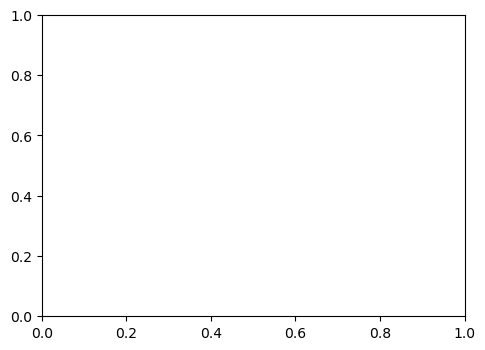

In [24]:
# Load model data
model_temp = summary_GLORYS_temp
model_salt = summary_GLORYS_salt
model = "GLORYS"

model_df = model_temp.merge(
    model_salt,
    on=["CTD_file", "File_ID", "Region"],
    suffixes=("_temp", "_salt")
)

# Regions to plot
region_positions = {
    "N":  (0, 0),
    "NW": (1, 0),
    "CW": (2, 0),
    "SW": (3, 0),
    "NE": (0, 1),
    "CE": (1, 1),
    "SE": (2, 1)
}

fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 2, figure=fig)

for region, (r, c) in region_positions.items():
    ax = fig.add_subplot(gs[r, c])
    region_model = model_df[model_df["Region"] == region]
    
    all_temp_model, all_salt_model = [], []
    all_temp_omg, all_salt_omg = [], []
    
    for _, row in region_model.iterrows():
        # MODEL profile from CSV
        temps_model = parse_profile(row["Model_Profile_temp"])
        salts_model = parse_profile(row["Model_Profile_salt"])
        depths_model = parse_profile(row["depth_profile_temp"])
        #print("---- CTD_file:", row["CTD_file"])
        #print("Model_Profile_temp (raw):", row["Model_Profile_temp"])
        #print("Parsed temp length:", len(parse_profile(row["Model_Profile_temp"])))
        #print("Model_Profile_salt (raw):", row["Model_Profile_salt"])
        #print("Parsed salt length:", len(parse_profile(row["Model_Profile_salt"])))
        #print("Depth_profile_temp length:", len(parse_profile(row["depth_profile_temp"])))
        #break  # just inspect first row
        

        # pick depth range (here 200–500 m)
        valid_indices_model = [i for i, d in enumerate(depths_model) if 200 <= d <= 500]
        if valid_indices_model:
            avg_temp_model = np.mean([temps_model[i] for i in valid_indices_model])
            avg_salt_model = np.mean([salts_model[i] for i in valid_indices_model])
            all_temp_model.append(avg_temp_model)
            all_salt_model.append(avg_salt_model)

        # OMG profile
        ctd_file = row["CTD_file"]
        omg_temp, omg_salt, omg_depth = read_ctd_file(ctd_file)
        valid_indices_omg = [i for i, d in enumerate(omg_depth) if 200 <= d <= 500]
        if valid_indices_omg:
            avg_temp_omg = np.mean([omg_temp[i] for i in valid_indices_omg])
            avg_salt_omg = np.mean([omg_salt[i] for i in valid_indices_omg])
            all_temp_omg.append(avg_temp_omg)
            all_salt_omg.append(avg_salt_omg)
    
    # Plotting
    #ax.scatter(all_salt_model, all_temp_model, color='blue', alpha=0.6, s=10, marker='o', label='Model')
    #ax.scatter(all_salt_omg, all_temp_omg, color='red', alpha=0.6, s=10, marker='^', label='OMG')
    ax.scatter(all_salt_omg, all_temp_omg, color='gray', marker='x', label='OMG')
    ax.scatter(all_salt_model, all_temp_model, color='red', marker='.', label='Model')

     # try getting the density lines
    C = plt.contour(practical_salinity, potential_temperature, Rho,
                colors='silver', levels = np.arange(1020,1029))
    plt.gca().clabel(C, C.levels, inline=True, fontsize=10,
                fmt = lambda d : str(round(d))+' kg/m$^3$')



    # DENSITY LINES

    # define parameters in common units
    pressure = 5 # dbar
    practical_salinity = np.linspace(33.5,35.5) # psu
    potential_temperature = np.linspace(-2,8) # degrees C
    longitude = 0 # degrees
    latitude = 0 # degrees

    # convert to units used in density approximation
    absolute_salinity = gsw.conversions.SA_from_SP(practical_salinity, pressure, longitude, latitude)
    conservative_temperature = gsw.conversions.CT_from_pt(absolute_salinity, potential_temperature)

    # make a 2D mesh grid of salinity and temperature for plotting
    Absolute_Salinity, Conservative_Temperature = np.meshgrid(absolute_salinity, conservative_temperature)

    # compute density from salinity and temperature
    Rho = gsw.density.rho(Absolute_Salinity, Conservative_Temperature, pressure)
    
    
    C = plt.contour(practical_salinity, potential_temperature, Rho,
                colors='silver', levels = np.arange(1026,1029))
    plt.gca().clabel(C, C.levels, inline=True, fontsize=10,
                fmt = lambda d : str(round(d))+' kg/m$^3$')

    

    #plt.scatter(all_salt_omg, all_temp_omg, color='blue', marker='x', label='OMG')
    ax.set_title(f"{region} Region")
    ax.set_xlabel("Salinity")
    ax.set_ylabel("Temperature (°C)")
    ax.grid(True)
    ax.legend()
    #print(len(all_salt_model), len(all_temp_model))

plt.tight_layout()

fname = f"{model}_T_S_Plots.png".replace(" ", "_")
plt.savefig(os.path.join(plot_folder, fname), dpi=300)
plt.close()

print(f"Saved T_S plots to: {plot_folder}")


In [55]:
print(model_df.columns.tolist())

['CTD_file', 'File_ID', 'Var_type_temp', 'Region', 'OMG_Mean_temp', 'Model_Mean_temp', 'Difference_temp', 'Model_Profile_temp', 'depth_profile_temp', 'omg_depth_temp', 'Profile_Diff_temp', 'Var_type_salt', 'OMG_Mean_salt', 'Model_Mean_salt', 'Difference_salt', 'Model_Profile_salt', 'depth_profile_salt', 'omg_depth_salt', 'Profile_Diff_salt']
